In [272]:
# Importing the library 'pandas' for the machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the data from the csv file onto the 'df' dataframe
df = pd.read_csv('./wdbc.csv',header=None)

In [273]:
# Removing the column with ID Number since it's irrelevant to our classifier
df.drop(df.columns[0], axis=1, inplace=True)

In [274]:
# Confirming removal of ID Number
print(df.shape)

(569, 31)


In [275]:
# Splitting the output variable and the training features
y = df.iloc[:,0]
df.drop(df.columns[0], axis=1, inplace=True)

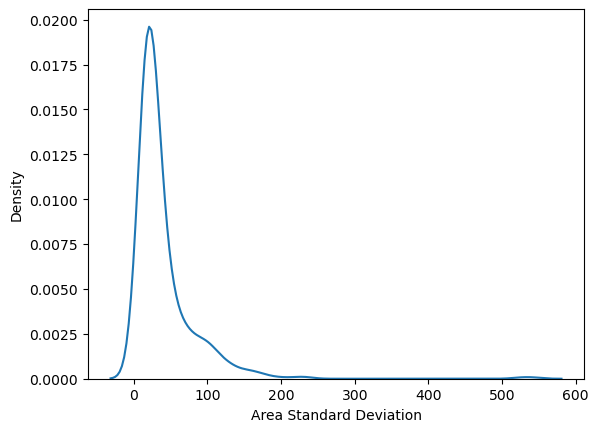

In [276]:
# sns.kdeplot(df[15])
# plt.show()
p=sns.kdeplot(data=df[15])
p.set_xlabel("Area Standard Deviation")
plt.show()

# sns.histplot(df[15], log_scale=True)
# plt.show()

In [277]:
arr = [2,4,5,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,24,25,27,28,30,31]

for x in arr:
    df[x] = np.log10(df[x] + 1)
    

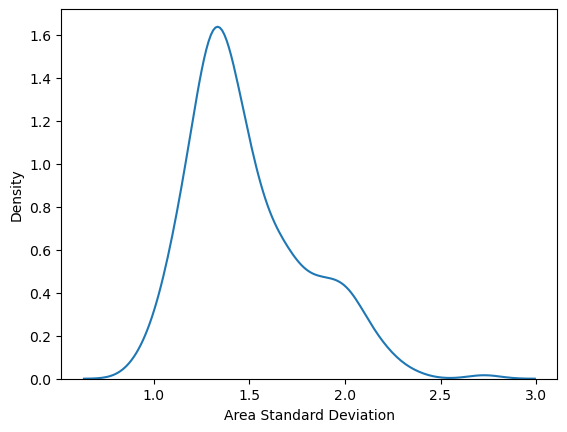

In [278]:
p=sns.kdeplot(data=df[15])
p.set_xlabel("Area Standard Deviation")
plt.show()

In [279]:
# for x in df.columns:
#     print("*****")
#     print(x)
#     print(df[x].skew())

In [280]:
# Normalization

# df[3] = (df[3] - df[3].min()) / (df[3].max() - df[3].min())
# df[23] = (df[23] - df[23].min()) / (df[23].max() - df[23].min())

In [281]:
columns = ["Radius","Texture","Perimeter", "Area", "Smoothness","Compactness","Concavity", "ConcavePoints","Symmetry","FractalDimenstion",
"RadiusStandardDeviation","TextureStandardDeviation","PerimeterStandardDeviation", "AreaStandardDeviation", "SmoothnessStandardDeviation","CompactnessStandardDeviation","ConcavityStandardDeviation", "ConcavePointsStandardDeviation","SymmetryStandardDeviation","FractalDimenstionStandardDeviation",
"RadiusWorstValue","TextureWorstValue","PerimeterWorstValue", "AreaWorstValue", "SmoothnessWorstValue","CompactnessWorstValue","ConcavityWorstValue", "ConcavePointsWorstValue","SymmetryWorstValue","FractalDimenstionWorstValue", "Diagnosis"]

# df['Diagnosis'] = y

In [282]:
import arff

arff.dump('wdbc.arff', df.values, relation='wdbc', names=columns)

In [283]:
# Importing the normalizer and the column transformer for the data preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

import numpy as np

ct = ColumnTransformer([("normalize", Normalizer(), [1,21])], remainder='passthrough')

df = ct.fit_transform(df)

In [284]:
# # Encoding the output variable to numeric class labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [285]:
# Splitting the model in 70-30 scheme for training
from sklearn.model_selection import train_test_split

# The overall dataset is splitted into two sets of training and testing randomly
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=6, stratify=y)

In [286]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# GaussianNB is the Naive Bayese implementation in sklearn library
# ConfusionMatrixDisplay and confusion_matrix gives us the confusion matrix

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
cm_display = ConfusionMatrixDisplay(cm).plot()


Number of mislabeled points out of a total 171 points : 7
Confusion matrix


In [287]:
# Final metrics 
from sklearn.metrics import accuracy_score, roc_curve, RocCurveDisplay, classification_report

print("Accuracy :", accuracy_score(y_test, y_pred))

tn, fp, fn, tp = cm.ravel()
print("Specificity :", (tn / (tn+fp)))
print("Sensitivity :", (tp / (tp+fn)))

print(classification_report(y_test, y_pred, target_names = ['Benign', 'Malignant']))

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Accuracy : 0.9590643274853801
Specificity : 0.9813084112149533
Sensitivity : 0.921875
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.97       107
   Malignant       0.97      0.92      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

